Found 8276 images belonging to 4 classes.
Found 2067 images belonging to 4 classes.
Epoch 1/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 676s 625ms/step - accuracy: 0.9442 - loss: 0.1968 - val_accuracy: 0.8728 - val_loss: 0.2915
Epoch 2/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 668s 645ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 0.9569 - val_loss: 0.0854
Epoch 3/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 678s 655ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.7408e-06
Epoch 4/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 823s 795ms/step - accuracy: 1.0000 - loss: 2.6147e-04 - val_accuracy: 1.0000 - val_loss: 1.0780e-06
Epoch 5/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 959s 927ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 4.2047e-05
Epoch 6/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 956s 923ms/step - accuracy: 0.9990 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 8.5964e-07
Epoch 7/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 972s 939ms/step - accuracy: 0.9991 - loss: 0.0034 

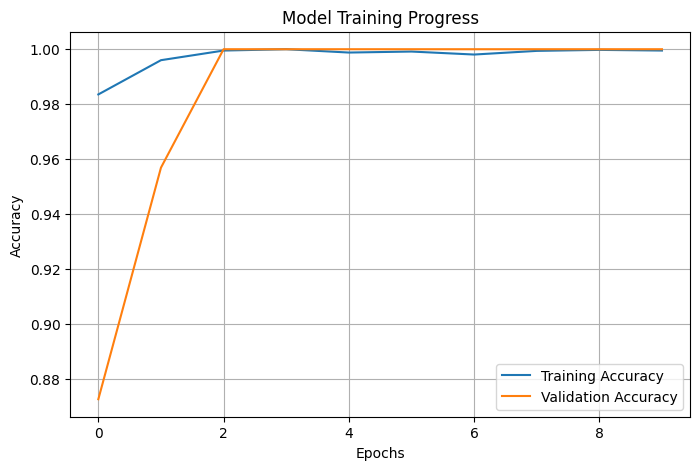

In [12]:
#  Import necessary libraries
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image

#  Set dataset path and parameters
DATASET_PATH = r"D:\\Samsung Prism\\Source\\dataset"  # Path containing 4 folders (one per game)
IMG_SIZE = 224
BATCH_SIZE = 8

#  Load dataset from single path
def load_dataset(path):
    datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)
    train = datagen.flow_from_directory(
        path, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
    val = datagen.flow_from_directory(
        path, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')
    return train, val

# Build and compile the model
def build_model(num_classes):
    base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#  Train and save the model with visible epoch progress
train_data, val_data = load_dataset(DATASET_PATH)
class_names = list(train_data.class_indices.keys())
model = build_model(len(class_names))

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1  # Display detailed progress per epoch
)

# Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Model Training Progress')
plt.show()

model.save("game_classifier_model.h5")


In [36]:
# Saving Our Model in Local Storage 
model.save("Eff_Net_b.h5")

NameError: name 'model' is not defined

In [35]:
# Summary About our Model

from prettytable import PrettyTable
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("game_classifier_model.h5")

# Create a table for the model summary
table = PrettyTable()
table.field_names = ["Layer Name", "Output Shape"]

for layer in loaded_model.layers:
    try:
        output_shape = layer.output.shape if hasattr(layer, 'output') else "No output"
    except Exception as e:
        output_shape = str(e)
    table.add_row([layer.name, output_shape])

print(table)


+----------------------------+-----------------------+
|         Layer Name         |      Output Shape     |
+----------------------------+-----------------------+
|       input_layer_3        |  (None, 224, 224, 3)  |
|        rescaling_6         |  (None, 224, 224, 3)  |
|      normalization_3       |  (None, 224, 224, 3)  |
|        rescaling_7         |  (None, 224, 224, 3)  |
|       stem_conv_pad        |  (None, 225, 225, 3)  |
|         stem_conv          |  (None, 112, 112, 40) |
|          stem_bn           |  (None, 112, 112, 40) |
|      stem_activation       |  (None, 112, 112, 40) |
|       block1a_dwconv       |  (None, 112, 112, 40) |
|         block1a_bn         |  (None, 112, 112, 40) |
|     block1a_activation     |  (None, 112, 112, 40) |
|     block1a_se_squeeze     |       (None, 40)      |
|     block1a_se_reshape     |    (None, 1, 1, 40)   |
|     block1a_se_reduce      |    (None, 1, 1, 10)   |
|     block1a_se_expand      |    (None, 1, 1, 40)   |
|     bloc

In [21]:
#validation  check from our Trained DataSet  which is used during Training 


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set batch size and image size
BATCH_SIZE = 8
IMG_SIZE = 224

# Create ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Create Validation Data using ImageDataGenerator with subset
val_data = datagen.flow_from_directory(
    r"D:\Samsung Prism\Source\dataset", 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE, 
    class_mode='categorical', 
    subset='validation'  # Correct subset
)

# Evaluate loaded model on validation data
val_loss, val_accuracy = loaded_model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Found 2067 images belonging to 4 classes.


c:\Users\Sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


259/259 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 1.0000 - loss: 2.8716e-07
Validation Loss: 0.0000
Validation Accuracy: 1.0000


In [40]:
# New Image From google , To test wheather our model can able to predict or not (for Output)


import tensorflow as tf
from PIL import Image
import numpy as np

# Define IMG_SIZE and class_names if not already defined
IMG_SIZE = 224  # or the size your model expects
class_names = ['pubglite', 'pubgmobile', 'pubgnewstate' , 'pubgpc']  # Replace with actual class labels

def predict_game(image_path, model_path="game_classifier_model.h5"):
    model = tf.keras.models.load_model(model_path)
    img = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    return class_names[np.argmax(predictions)]

# Example Prediction
external_image = r"D:\Samsung Prism\Source\1080p\maxresdefault.jpg"
print(predict_game(external_image))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
pubgpc
